In [1]:
import keras
from keras.models import Sequential 
from keras.layers import Dropout, Activation, Dense 
from keras.layers import Flatten, Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
data = np.load("mario_train.npz")
x_train = data["x_train"]
y_train = data["y_train"]

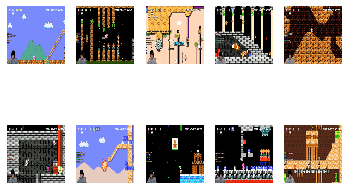

In [3]:
for i in range(1, 11):
    plt.subplot(2, 5, i)
    plt.axis("off")
    plt.imshow(x_train[i* 30,:,:,:])

In [4]:
x_train = x_train.astype("float32")
x_train /= 255
print(x_train.shape, y_train.shape)

(2222, 250, 250, 3) (2222, 5)


In [5]:
model = Sequential()

In [6]:
model.add(Conv2D(32, (3, 3), input_shape=(250, 250, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dropout(0.5))

model.add(Dense(5))
model.add(Activation("softmax"))

In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 248, 248, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 248, 248, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 124, 124, 32)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 124, 124, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 122, 122, 64)      18496     
_________________________________________________________________
activation_2 (Activation)    (None, 122, 122, 64)      0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 61, 61, 64)       

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [9]:
model.fit(x_train, y_train, batch_size=128, epochs=20, callbacks=[EarlyStopping(monitor="loss", patience=2)])


Epoch 1/20
2222/2222 [==============================] - 120s 54ms/step - loss: 15.6332 - accuracy: 0.2862
Epoch 2/20
2222/2222 [==============================] - 118s 53ms/step - loss: 1.4810 - accuracy: 0.3659
Epoch 3/20
2222/2222 [==============================] - 119s 53ms/step - loss: 1.1458 - accuracy: 0.5410
Epoch 4/20
2222/2222 [==============================] - 118s 53ms/step - loss: 0.7326 - accuracy: 0.7498
Epoch 5/20
2222/2222 [==============================] - 119s 54ms/step - loss: 0.4119 - accuracy: 0.8704
Epoch 6/20
2222/2222 [==============================] - 119s 54ms/step - loss: 0.2326 - accuracy: 0.9316
Epoch 7/20
2222/2222 [==============================] - 119s 53ms/step - loss: 0.1093 - accuracy: 0.9734
Epoch 8/20
2222/2222 [==============================] - 120s 54ms/step - loss: 0.0961 - accuracy: 0.9680
Epoch 9/20
2222/2222 [==============================] - 121s 54ms/step - loss: 0.0609 - accuracy: 0.9829
Epoch 10/20
2222/2222 [==============================

In [10]:
test = np.load("mario_test2.npz")
x_test = test["x_test"]
x_test = x_test.astype("float32")
x_test /= 255
y_test = test["y_test"]

In [11]:
model.evaluate(x_test, y_test)

150/150 [==============================] - 2s 13ms/step


[0.0, 1.0]

In [12]:
model.save("mario_2.h5")

In [15]:
from PIL import Image

In [24]:
def pngarray(name):
    img = Image.open(name)
    img = img.convert("RGB")
    img = img.resize((250, 250))
    data = np.asarray(img)
    data = np.expand_dims(data, axis = 0)
    return data

In [38]:
def mario(num):
    if num == 0:
        return "SM1"
    if num == 1:
        return "SM3"
    if num == 2:
        return "SMW"
    if num == 3:
        return "NSMU"
    if num == 4:
        return "N3DW"

In [41]:
import glob

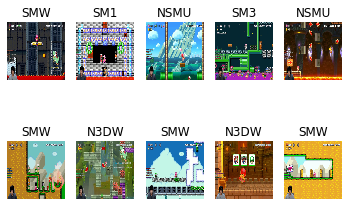

In [59]:
im_list = glob.glob("C:\\users\\성준\\Documents\\makedata\\test\\*.jpg")
for i, f in enumerate(im_list):
    plt.subplot(2, 5, i + 1)
    plt.axis("off")
    img = pngarray(f)
    plt.title(mario(np.argmax(model.predict(img))))
    plt.imshow(img.reshape(250, 250, 3))